In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
import tensorflow
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [ ]:
#NACTENI OBRAZKOVYCH DAT
trainPath = '/kaggle/input/gtsrb-german-traffic-sign/Train'

data=[]
labels=[]
dataset_category_count = 0
for dirs in os.listdir(trainPath): #slozky z Train foldery
    for files in os.listdir(trainPath+'/'+ dirs): #obrazek z foldery v kategorii
        try:
            sign_img = np.array(image.load_img(trainPath + "/"+ dirs +"/"+ files, target_size = (32,32)))
            data.append(sign_img) #do seznamu s obrazkovymi daty prida aktualne zpracovany/nacteny obrazek
            labels.append(int(dirs)) #do seznamu s labely prida cislo labelu ve kterem se obrazek nachazi
        except:
            pass
    dataset_category_count += 1
print(str(dataset_category_count))    
print(len(data),len(labels))

In [16]:
#popisky obrazku
category_labels = {
    0:"Speed limit (20km/h)",
    1:"Speed limit (30km/h)",
    2:"Speed limit (50km/h)",
    3:"Speed limit (60km/h)",
    4:"Speed limit (70km/h)",
    5:"Speed limit (80km/h)",
    6:"End of speed limit (80km/h)",
    7:"Speed limit (100km/h)",
    8:"Speed limit (120km/h)",
    9:"No passing",
    10:"No passing for vehicles over 3.5 metric tons",
    11:"Right-of-way at the next intersection",
    12:"Priority road",
    13:"Yield",
    14:"Stop",
    15:"No vehicles",
    16:"Vehicles over 3.5 metric tons prohibited",
    17:"No entry",
    18:"General caution",
    19:"Dangerous curve to the left",
    20:"Dangerous curve to the right",
    21:"Double curve",
    22:"Bumpy road",
    23:"Slippery road",
    24:"Road narrows on the right",
    25:"Road work",
    26:"Traffic signals",
    27:"Pedestrians",
    28:"Children crossing",
    29:"Bicycles crossing",
    30:"Beware of ice/snow",
    31:"Wild animals crossing",
    32:"End of all speed and passing limits",
    33:"Turn right ahead",
    34:"Turn left ahead",
    35:"Ahead only",
    36:"Go straight or right",
    37:"Go straight or left",
    38:"Keep right",
    39:"Keep left",
    40:"Roudabout mandatory",
    41:"End of no passing",
    42:"End of no passing by vehicles over 3.5 metric tons",
}

In [3]:
for i in range(3):
    rnd = random.randint(0,len(data))
    print(str(rnd))
    preview = plt.imshow(data[rnd])
    preview_title = plt.title(category_labels[labels[rnd]])
    plt.show()

NameError: name 'data' is not defined

In [ ]:
y_categorical = tensorflow.keras.utils.to_categorical(labels,43)
print(y_categorical.shape)
#rozrazeni datasetu na trenovaci a testovaci data
X_train, X_test, y_train, y_test = train_test_split(data, y_categorical, test_size=0.2, random_state=123)

print('X_train length:', len(X_train))
print('y_train length:', len(y_train))
print('X_test length:', len(X_test))
print('y_test length:', len(y_test))

In [ ]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
#převede z RGB 0-255 na float 0-1
X_train_norm = X_train_array/255.0

print("X_train_norm shape: ", X_train_norm.shape)
print("y_train_array shape: ", y_train_array.shape)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)
X_test_norm = X_test_array/255.0
print('X_test_norm shape: ', X_test_norm.shape)
print("y_test_array shape: ", y_test_array.shape)

In [ ]:
resnet_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

In [ ]:
resnet_output = resnet_model.output
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = Dropout(0.5)(resnet_output)
predictions = Dense(43, activation = 'softmax')(resnet_output)
model = Model(inputs = resnet_model.input, outputs = predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
fit_history = model.fit(X_train_norm,y_train_array,
                        validation_data=(X_test_norm,y_test_array),
                        batch_size=256,
                        epochs=20, verbose=1)

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.figure(figsize=(12, 5))

plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test_norm, y_test_array)
print('Accuracy: ', acc, '\nLoss    : ', loss)

In [ ]:
#predikce modelu
model_predictions = model.predict(X_test_norm)
predictions = np.argmax(model_predictions, axis = 1)
actual_values = np.argmax(y_test_array, axis = 1)


In [ ]:
def show_prediction_results(x_test,predict,act,i):
    image = plt.imshow(x_test[i])
    l=plt.title('Pred: ' + category_labels[predict[i]] + '\nAct: ' + category_labels[act[i]])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))


for i in range(20):
    rnd = random.randint(0,len(X_test))
    ax = fig.add_subplot(5, 4, i + 1)
    show_prediction_results(X_test,predictions,actual_values, rnd)

plt.show()


In [ ]:
model.save('/kaggle/working/smap_model.h5')

In [6]:
loaded = keras.models.load_model('/kaggle/working/smap_model.h5')

In [40]:
def predict_sign(pathToImage):
    listOfImgData = []
    testImg = np.array(image.load_img(pathToImage, target_size=(32,32)))
    listOfImgData.append(testImg)
    imgArray = np.array(listOfImgData)
    normalizedImg = imgArray / 255.0
    imgPredictions = loaded.predict(normalizedImg)
    pr = np.argmax(imgPredictions, axis = 1)
    plt.imshow(testImg)
    plt.title(category_labels[pr[0]])
    plt.show()

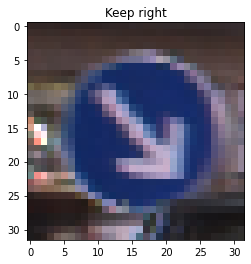

In [41]:
test_prediction = predict_sign('/kaggle/input/gtsrb-german-traffic-sign/Test/00002.png')